In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the AAPL.csv dataset
df = pd.read_csv('/content/INDIA VIX_minute.csv')

# Display the first few rows and info to understand the data structure
display(df.head())
df.info()

,date,open,high,low,close,volume
0,2015-01-09 09:15:00,16.47,16.47,14.46,15.39,0.0
1,2015-01-09 09:16:00,15.39,15.47,15.33,15.45,0.0
2,2015-01-09 09:17:00,15.45,15.51,15.41,15.46,0.0
3,2015-01-09 09:18:00,15.46,15.50,15.33,15.40,0.0
4,2015-01-09 09:19:00,15.39,15.40,15.29,15.35,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114979 entries, 0 to 114978
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    114979 non-null  object 
 1   open    114979 non-null  float64
 2   high    114979 non-null  float64
 3   low     114979 non-null  float64
 4   close   114979 non-null  float64
 5   volume  114978 non-null  float64
dtypes: float64(5), object(1)
memory usage: 5.3+ MB


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Clean missing values
df = df.dropna()

In [ ]:
# Compute daily returns
df['returns'] = df['close'].pct_change()

# Compute rolling standard deviation (20-day volatility)
df['rolling_Std_20'] = df['returns'].rolling(20).std()

In [ ]:
# Note: Not needed here. But since it's part of day 2, I resampled to include all days(for daily). This is needed because
# the stock market remains closed on weekends and holidays. So the "trading days" do not include all calendar days. Suppose
# we want to teach a model based on calendar days, we'll have to force the data indices to include all days. So it now include
# weekends and holidays and fills it with Nan. I also resampled to include the last closing price per week. This gives weekly
# trends and tend to flucluate way lesser. So it can be used to reduce noise and study long term investments.

daily = df['close'].resample('D').ffill()
weekly = df['close'].resample('W').last()

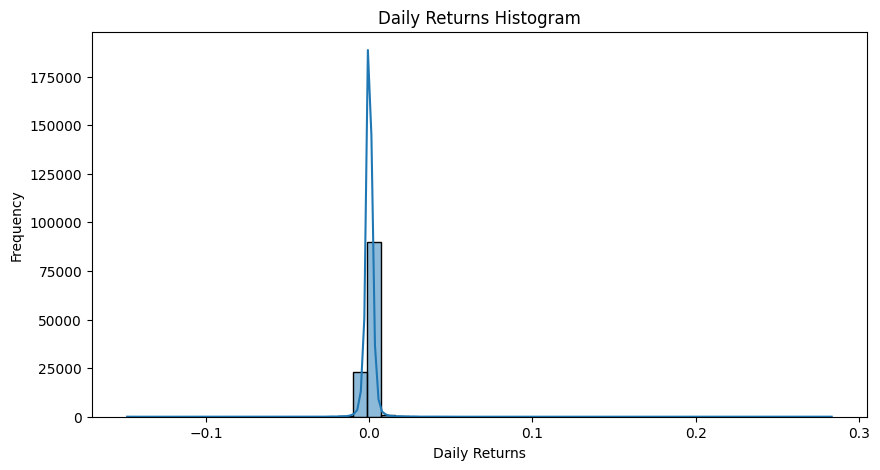

In [ ]:
# Plot Returns Histogram
plt.figure(figsize=(10,5))
sns.histplot(df['returns'].dropna(), bins=50, kde=True)
plt.title("Daily Returns Histogram")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.show()

A histogram of returns shows how often different return values occur. The histogram groups returns into bins. The first day return is NaN (because there's no previous day to compare).
This has to be removed so the plot doesn’t error. The histogram is divided into 50 groups. Each bin represents a range of returns. kde=True draws a smooth line (Kernel Density Estimate). From the plot we see, most returns cluster near 0 and the center of the histogram is tall. This means that, most days, the price moves only a little (±1%).
There are no bars on the far left/right edges. This means, very big returns do not occur. Thus, we can assume there are no market crashes or big news events.
Also, the distribution is more heavy on the positive side (right skew). This means the stock suddenly shoots up more often.
Since, it's a narrow histogram, it shows a stable stock.

A histogram of returns shows how often different return values occur. The histogram groups returns into bins. The first day return is NaN (because there's no previous day to compare).
This has to be removed so the plot doesn’t error. The histogram is divided into 50 groups. Each bin represents a range of returns. kde=True draws a smooth line (Kernel Density Estimate). From the plot we see, most returns cluster near 0 and the center of the histogram is tall. This means that, most days, the price moves only a little (±1%).
There are no bars on the far left/right edges. This means, very big returns do not occur. Thus, we can assume there are no market crashes or big news events.
Also, the distribution is more heavy on the positive side (right skew). This means the stock suddenly shoots up more often.
Since, it's a narrow histogram, it shows a stable stock.

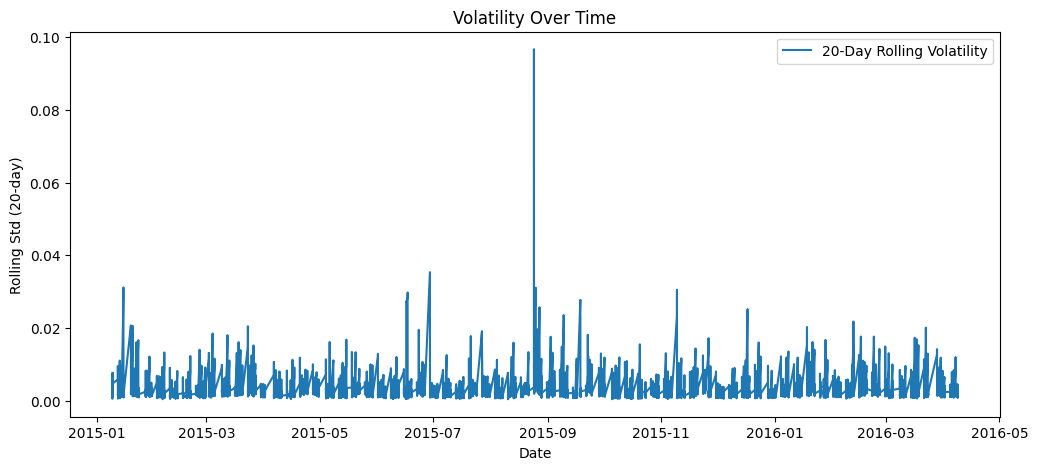

In [ ]:
# Plot Rolling Standard Deviation (Volatility)
plt.figure(figsize=(12,5))
plt.plot(df['rolling_Std_20'], label="20-Day Rolling Volatility")
plt.title("Volatility Over Time")
plt.xlabel("Date")
plt.ylabel("Rolling Std (20-day)")
plt.legend()
plt.show()

Rolling volatility is a 20-day rolling standard deviation of returns. It gives how risky the stock has been over the past 20 days at each point in time.
On plotting rolling volatility on a line graph: X-axis = dates, Y-axis = volatility (rolling std) where, Higher line = more volatility, Lower line = less volatility
When the line is low: the market is stable with small daily movements and low risk
When the line spikes: it signifies big price swings, uncertainty, news events, market crashes and earnings announcements.
From the graph, most of the volatility values are small, which means stocks often move only 0.1% to 1% per day, so volatility stays low. That's why the line is mostly flat and close to 0.00–0.01.
The sharp spike (near 0.10, i.e., 10% daily volatility) means that during that period, returns were extremely unstable.
Many tiny spikes can be seen because returns jump randomly, i.e, on some days it's +3% and on some days, –2%. These short jumps create little local volatility spike

Rolling volatility is a 20-day rolling standard deviation of returns. It gives how risky the stock has been over the past 20 days at each point in time.
On plotting rolling volatility on a line graph: X-axis = dates, Y-axis = volatility (rolling std) where, Higher line = more volatility, Lower line = less volatility
When the line is low: the market is stable with small daily movements and low risk
When the line spikes: it signifies big price swings, uncertainty, news events, market crashes and earnings announcements.
From the graph, most of the volatility values are small, which means stocks often move only 0.1% to 1% per day, so volatility stays low. That's why the line is mostly flat and close to 0.00–0.01.
The sharp spike (near 0.10, i.e., 10% daily volatility) means that during that period, returns were extremely unstable.
Many tiny spikes can be seen because returns jump randomly, i.e, on some days it's +3% and on some days, –2%. These short jumps create little local volatility spike

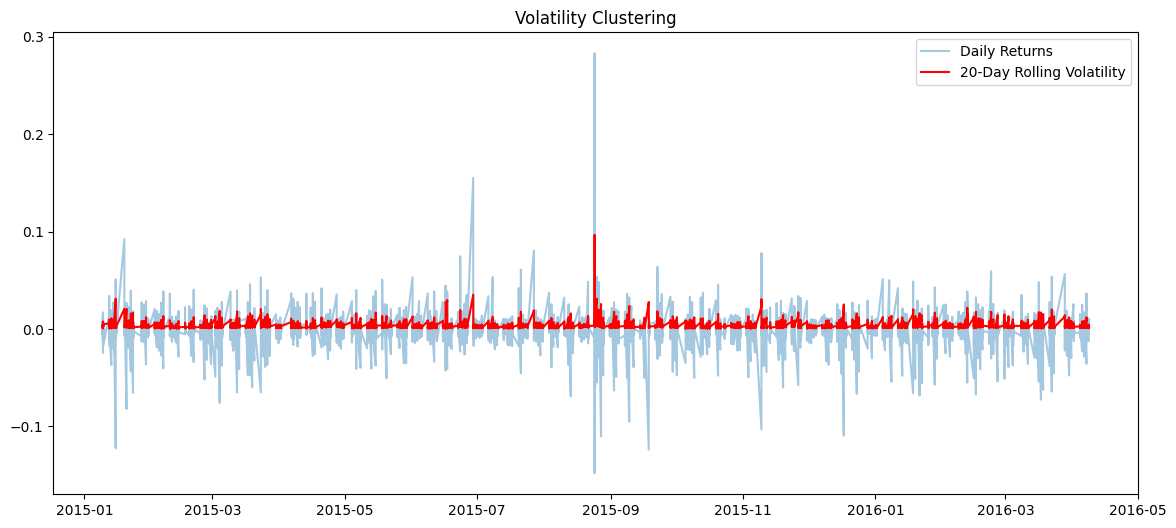

In [ ]:
# Plot daily returns AND volatility together
plt.figure(figsize=(14,6))
plt.plot(df['returns'], alpha=0.4, label="Daily Returns")
plt.plot(df['rolling_Std_20'], color='red', label="20-Day Rolling Volatility")
plt.title("Volatility Clustering")
plt.legend()
plt.show()

From the above graph, we see clearly that the volatility curve rises when returns become wild, and falls when returns calm down.
Also we see that volatility happens in clusters. Volatility clustering in finance is the observed tendency for market volatility (price swings) to group together, meaning periods of big price changes (high volatility) are followed by more big changes, while calm periods (low volatility) follow other calm periods

From the above graph, we see clearly that the volatility curve rises when returns become wild, and falls when returns calm down.
Also we see that volatility happens in clusters. Volatility clustering in finance is the observed tendency for market volatility (price swings) to group together, meaning periods of big price changes (high volatility) are followed by more big changes, while calm periods (low volatility) follow other calm periods